In [1]:
import numpy as np, matplotlib.pyplot as plt

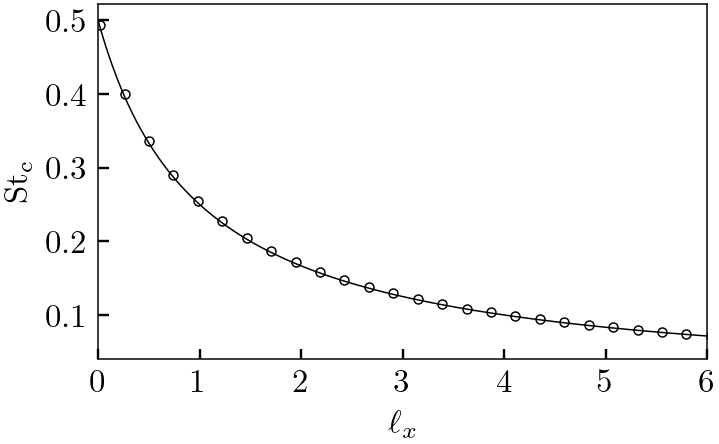

In [2]:
lx, Stc = np.genfromtxt('data/l_x_Stc.txt').T

plt.figure(figsize=(3.375, 2.1))
pl, = plt.plot(lx, Stc, 'o', mfc='None')

lx = np.linspace(0, lx[-1], 1000)
Stc = 1/(2*(1+lx))
plt.plot(lx, Stc, '-', c=pl.get_color())

plt.xlabel(r'$\ell_x$')
plt.ylabel(r'$\mathrm{St}_\mathrm{c}$')
plt.xlim(0, 6)

plt.show()

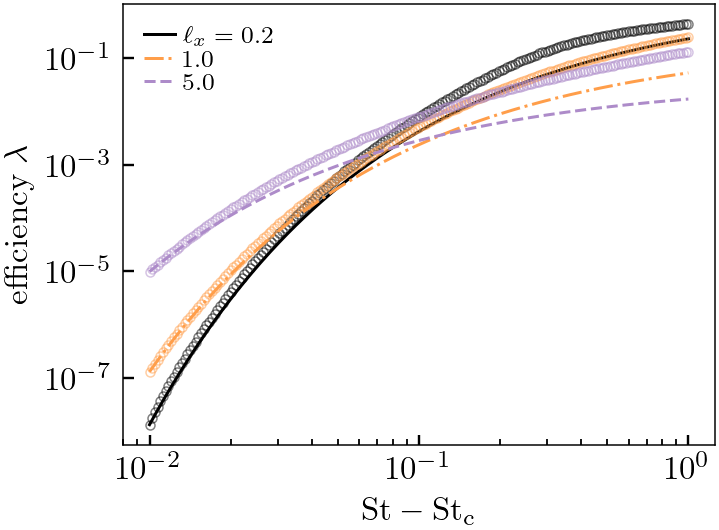

In [3]:
plt.figure(figsize=(3.375, 2.5))

first = True
for lx, fmt in zip([0.2, 1.0, 5.0], ['-', '-.', '--']):
    label = f'{lx:.1f}'
    if first:
        label = r'$\ell_x = ' + f'{label}$'
        first = False

    dSt, lam = np.genfromtxt(f'data/l_x={lx:.1f}.txt').T
    pl, = plt.plot(dSt, lam, 'o', mfc='None', alpha=0.5)

    x = np.geomspace(dSt[0], dSt[-1], 1000)
    y = np.exp(- (4 - 2**0.5) / (4*np.sqrt(1 + lx)) * np.pi / x**0.5)
    y *= lam[0] / y[0]
    plt.plot(x, y, fmt, c=pl.get_color(), lw=1, label=label)

plt.xlabel(r'$\mathrm{St} - \mathrm{St}_\mathrm{c}$')
plt.ylabel(r'efficiency $\lambda$')
plt.legend(loc='best')

plt.xscale('log')
plt.yscale('log')

plt.savefig('ellipseEff.png')
plt.savefig('ellipseEff.pdf')

plt.show()